# Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df =pd.read_csv('netflix.csv')

In [ ]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Un-nesting the columns
a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

In [ ]:

# explode method dont work in case of duplicate  index
explode_cast = df.reset_index(drop=True).assign(cast=df['cast'].str.split(', ')).explode('cast')
explode_dirctor = df.reset_index(drop=True).assign(director=df['director'].str.split(', ')).explode('director')

In [ ]:
explode_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
# It will always work but a bit lenghty
un_nest_cast = df.set_index('title')['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='cast')


In [ ]:
un_nest_cast

,title,cast
0,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
2,Blood & Water,Gail Mabalane
3,Blood & Water,Thabang Molaba
4,Blood & Water,Dillon Windvogel
...,...,...
64121,Zubaan,Manish Chaudhary
64122,Zubaan,Meghna Malik
64123,Zubaan,Malkeet Rauni
64124,Zubaan,Anita Shabdish


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# Handling null values
a. For categorical variables with null values, update those rows as
unknown_column_name.
Example : Replace missing value with Unknown Actor for missing value in
Actors column.
b. Replace with 0 for continuous variables having null values.

In [ ]:
# As un nesting or explode changing the actual data set, so called it again
df =pd.read_csv('netflix.csv')

In [ ]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [ ]:
# Replace missing values in categorical variables with 'Unknown'
df['cast'] = df['cast'].fillna('Unknown Actor')
df['director'] = df['director'].fillna('Unknown director')
df['country'] = df['country'].fillna('Unknown country')
df['listed_in'] = df['listed_in'].fillna('Unknown Genres')

# Replace missing values in continuous variables with 0
df['duration'] = df['duration'].fillna(0)
df['release_year'] = df['release_year'].fillna(0)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Actor,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Que 1: How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
filtered_df = df[(df['release_year'] >= 1991) & (df['release_year'] <= 2021)]

In [ ]:
movies_per_year = filtered_df.groupby('release_year').size()

In [ ]:
movies_per_year

release_year
1991      17
1992      23
1993      28
1994      22
1995      25
1996      24
1997      38
1998      36
1999      39
2000      37
2001      45
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
dtype: int64

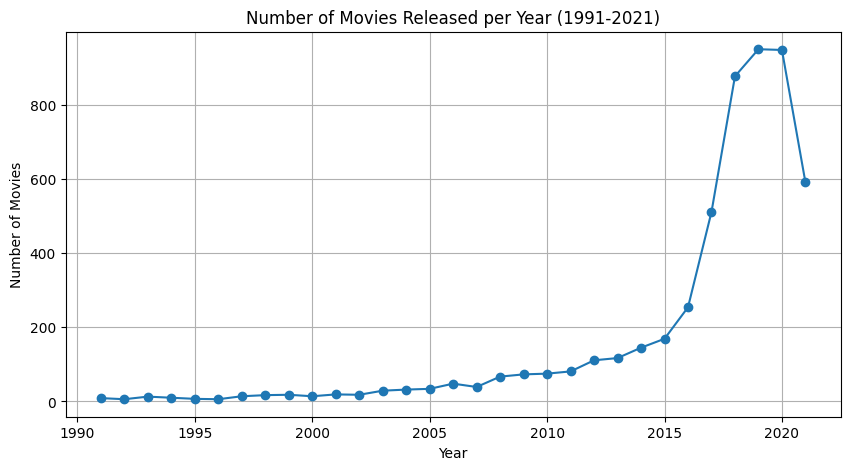

In [ ]:
# Filter the data to include only the years from 1991 to 2021
filtered_df = df[(df['release_year'] >= 1991) & (df['release_year'] <= 2021)]

# Group the filtered data by year and count the number of movies released each year
movies_per_year = filtered_df.groupby('release_year').size()

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released per Year (1991-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


# Data Insights
The significant increase of movie release in
recent years (especially after 2015 reaching peak in 2019 and 2020) could indicate a saturation in the market.

Netflix could use this information to focus on quality over quantity and
ensure that they are offering unique and compelling content to attract viewers.

# Que 2. Comparison of tv shows vs. movies.
a. Find the number of movies produced in each country and pick the top 10 countries.
Hint : We want you to apply group by each country and find the count of unique titles of movies
b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.
Hint : We want you to apply group by each country and find the count of unique titles of Tv-shows
_______________________________

In [ ]:
# Filter for movie
movies = df[df['type'] == 'Movie']
# Group by country and count the number of unique titles
movie_counts = movies.groupby('country')['title'].nunique().reset_index()
# Get the top 10 countries with the most movies produced
top10_movie = movie_counts.sort_values(by='title', ascending=False).head(10)
# Repeat the  process
tv_shows = df[df['type'] == 'TV Show']
tv_show_counts = tv_shows.groupby('country')['title'].nunique().reset_index()
top_tv_show = tv_show_counts.sort_values(by='title', ascending=False).head(10)
print("Top 10 countries by number of movies produced:")
print(top10_movie)
print("\nTop 10 countries by number of TV shows produced:")
print(top_tv_show)


Top 10 countries by number of movies produced:
             country  title
525    United States   2058
218            India    893
640  Unknown country    440
440   United Kingdom    206
50            Canada    122
384            Spain     97
128            Egypt     92
319          Nigeria     86
238        Indonesia     77
278            Japan     76

Top 10 countries by number of TV shows produced:
             country  title
160    United States    760
195  Unknown country    391
140   United Kingdom    213
83             Japan    169
120      South Korea    158
66             India     79
132           Taiwan     68
17            Canada     59
47            France     49
125            Spain     48


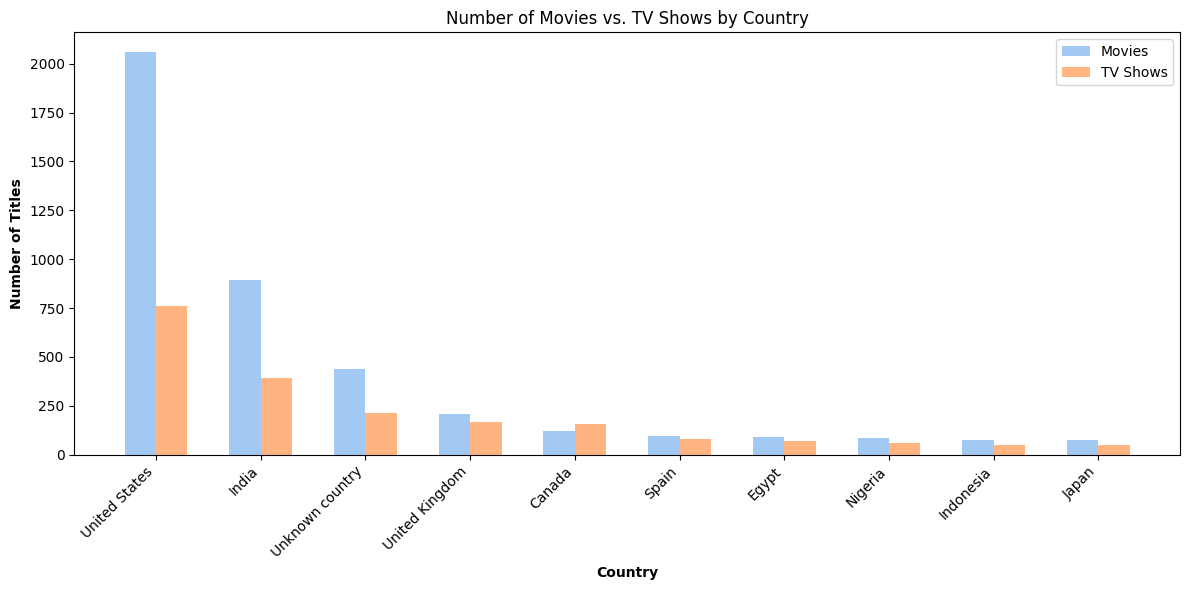

In [ ]:
plt.figure(figsize=(12, 6))
barWidth = 0.3
r1 = range(len(top10_movie))
r2 = [x + barWidth for x in r1]

# Using a Seaborn color palette for better color differentiation
colors = sns.color_palette("pastel", 2)

plt.bar(r1, top10_movie['title'], color=colors[0], width=barWidth, label='Movies')
plt.bar(r2, top_tv_show['title'], color=colors[1], width=barWidth, label='TV Shows')

plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of Titles', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(top10_movie))], top10_movie['country'])
plt.title('Number of Movies vs. TV Shows by Country')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


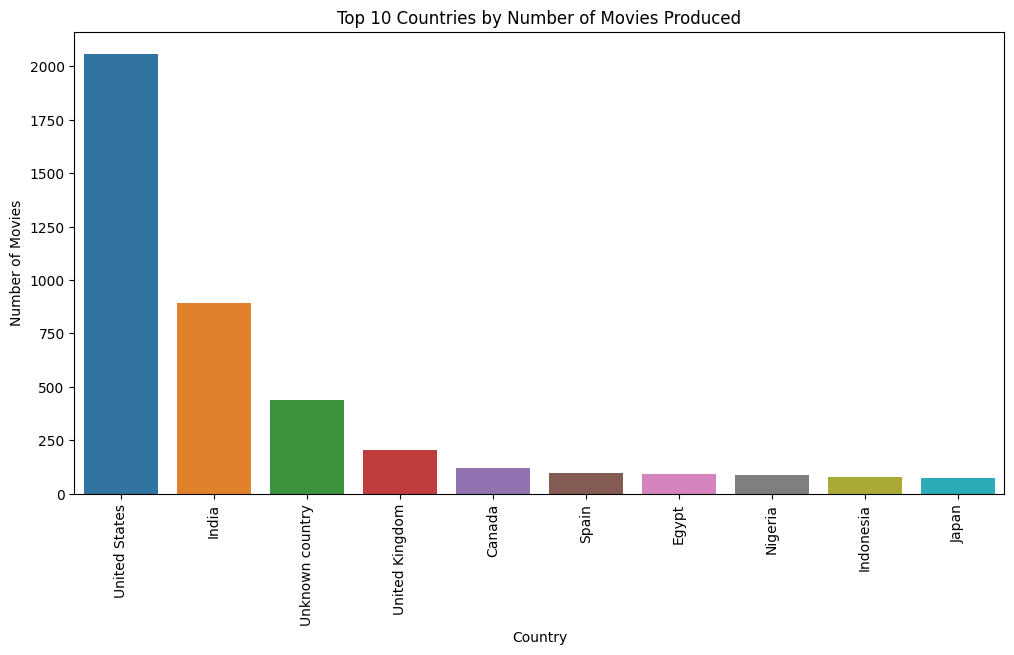

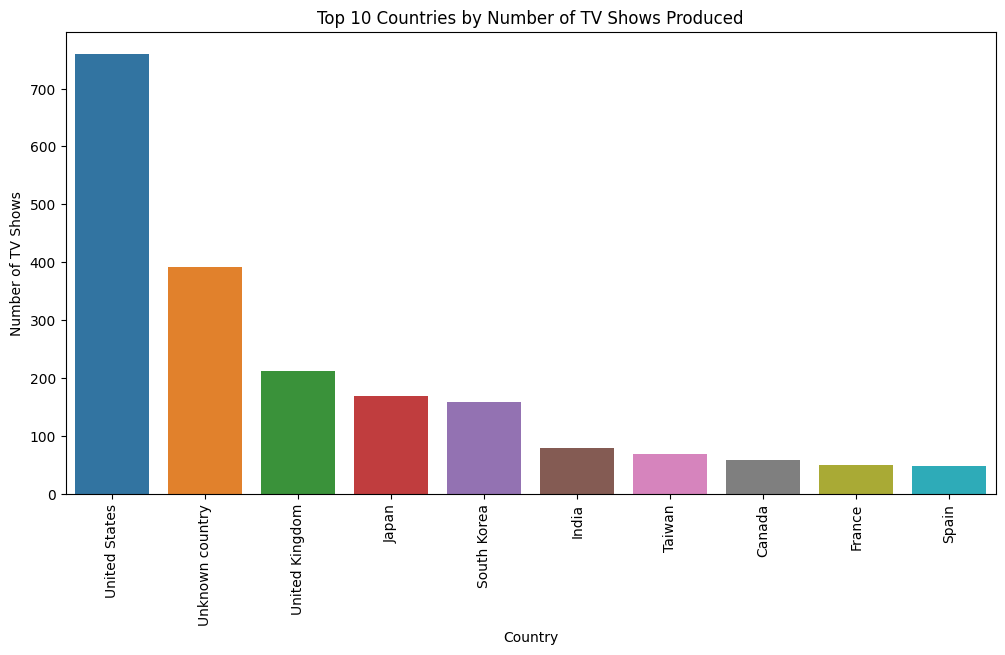

In [ ]:
# Data for movies
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='title', data=top10_movie, hue ='country')
plt.xticks(rotation = 90)
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

# Data for TV shows
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='title', data=top_tv_show,hue ='country')
plt.xticks(rotation = 90)
plt.title('Top 10 Countries by Number of TV Shows Produced')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.show()


# Data Insights

United States producing the most movies (2058) and TV shows (760), tailoring content for American viewers can capitalize on this market's dominance.

India ranks second in movie production (893), making it a lucrative market for producing more Indian movies.

Japan's high TV show production (169) suggests a strong market for anime, presenting an opportunity for Netflix to expand its anime offerings.

Countries like Indonesia and Nigeria, while not in the top 10 for TV shows, have potential for growth in the film industry.

The UK ranks third in TV show production (213), indicating a strong demand for TV show.




# 3. What is the best time to launch a TV show?
a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies
Hint : We expect you to create a new column and group by each week and count
the total number of movies/ tv shows.
b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies  
Hint : We expect you to create a new column and group by each month and
count the total number of movies/ tv shows.

In [ ]:
# Taking as data not df
data =pd.read_csv('netflix.csv')

In [ ]:
# Converting 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract week and month
data['week'] = data['date_added'].dt.isocalendar().week
data['month'] = data['date_added'].dt.month_name()

# Group by week and month and count total number of movies and TV shows
week_counts = data.groupby(['type', 'week'])['title'].count().reset_index()
month_counts = data.groupby(['type', 'month'])['title'].count().reset_index()

# Find the best week to release for movies and TV shows
best_week_movie = week_counts[week_counts['type'] == 'Movie'].sort_values('title', ascending=False).iloc[0]
best_week_tv_show = week_counts[week_counts['type'] == 'TV Show'].sort_values('title', ascending=False).iloc[0]

# Find the best month to release for movies and TV shows
best_month_movie = month_counts[month_counts['type'] == 'Movie'].sort_values('title', ascending=False).iloc[0]
best_month_tv_show = month_counts[month_counts['type'] == 'TV Show'].sort_values('title', ascending=False).iloc[0]

print("Best week to release a movie:", best_week_movie['week'])
print("Best week to release a TV show:", best_week_tv_show['week'])

print("\nBest month to release a movie:", best_month_movie['month'])
print("Best month to release a TV show:", best_month_tv_show['month'])


Best week to release a movie: 1
Best week to release a TV show: 27

Best month to release a movie: July
Best month to release a TV show: December



# Data Insights
While movies perform best when released early in the year (Week 1), TV shows see higher viewership when launched around mid-year (Week 27).

This difference in release patterns highlights the importance of tailoring release schedules based on the type of content being offered.

# 4.Analysis of actors/directors of different types of shows/movies.
a. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each actor and find the count of unique titles of
Tv-shows/movies

b. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each director and find the count of unique titles
of Tv-shows/*movies*

In [ ]:
# Handling null values
df['cast'] = df['cast'].fillna('Unknown Actor')
df['director'] = df['director'].fillna('Unknown director')

# Not considering Unknown Actor and Unknown Directors counts
df = df[df['cast'] != 'Unknown Actor']
df = df[df['director'] != 'Unknown director']

# Splitting  and exploding the dataframe
explode_cast = df.assign(cast=df['cast'].str.split(', ')).explode('cast')
explode_dirctor = df.assign(director=df['director'].str.split(', ')).explode('director')


# Grouping by each actor and finding the count of unique titles
actor_counts = explode_cast.groupby('cast')['title'].nunique()

# Identifying the top 10 actors
top_10_actors = actor_counts.sort_values(ascending=False).head(10)

# Grouping by each director and finding the count of unique titles
director_counts = explode_dirctor.groupby('director')['title'].nunique()

# Identifying the top 10 directors
top_10_directors = director_counts.sort_values(ascending=False).head(10)



In [ ]:
top_10_actors

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Amitabh Bachchan    28
Paresh Rawal        28
Julie Tejwani       28
Boman Irani         27
Rupa Bhimani        27
Name: title, dtype: int64

In [ ]:
top_10_directors

director
Jan Suter              21
Raúl Campos            19
Rajiv Chilaka          19
Marcus Raboy           16
Jay Karas              15
Suhas Kadav            13
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: title, dtype: int64

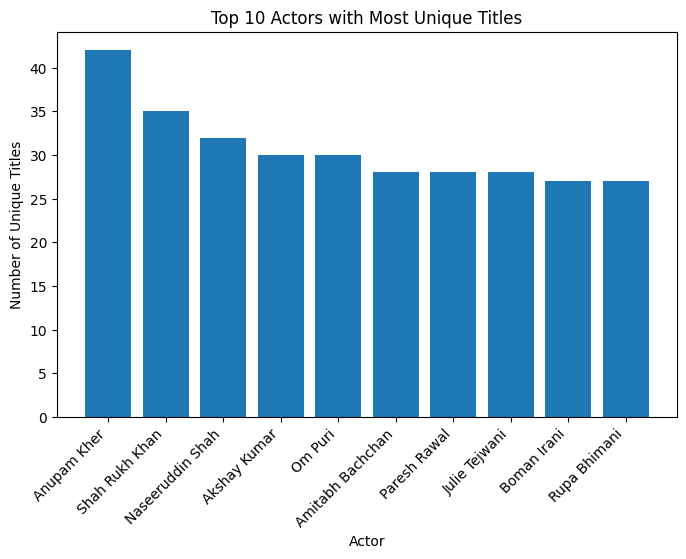

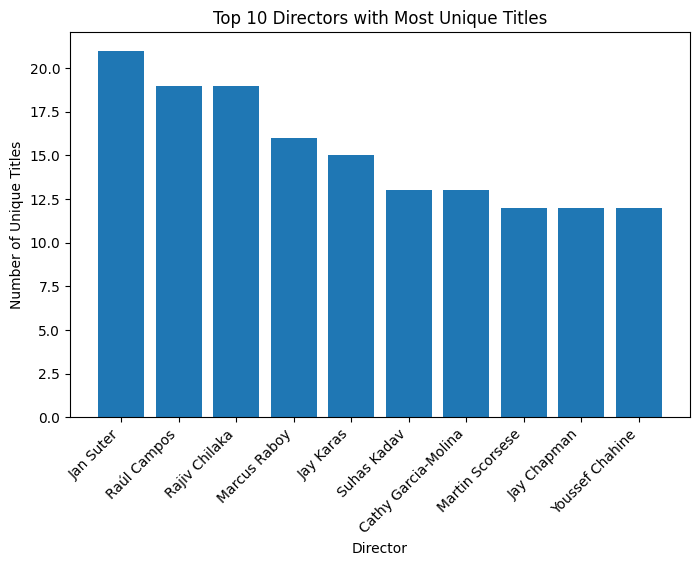

In [ ]:
# Creating a bar plot for the top 10 actors
plt.figure(figsize=(8, 5))
plt.bar(top_10_actors.index, top_10_actors.values)
plt.xlabel('Actor')
plt.ylabel('Number of Unique Titles')
plt.title('Top 10 Actors with Most Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a bar plot for the top 10 directors
plt.figure(figsize=(8, 5))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.xlabel('Director')
plt.ylabel('Number of Unique Titles')
plt.title('Top 10 Directors with Most Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data Insights
Bollywood icons such as Shah Rukh Khan, Akshay Kumar, and Amitabh Bachchan feature prominently among the top actors. Their star power and fan following contribute significantly to the appeal of Netflix content,especially among Indian audiences.

The inclusion of directors like Jan Suter,Raúl Campos and Marcus Raboy, who have directed a significant number of titles on Netflix, suggests the platform's global reach. Netflix's ability to attract talent from around the world contributes to its diverse and inclusive content library, appealing to a global audience.

# 5. Which genre movies are more popular or produced more
Hint : We want you to apply the word cloud on the genre columns to know which kind
of genre is produced

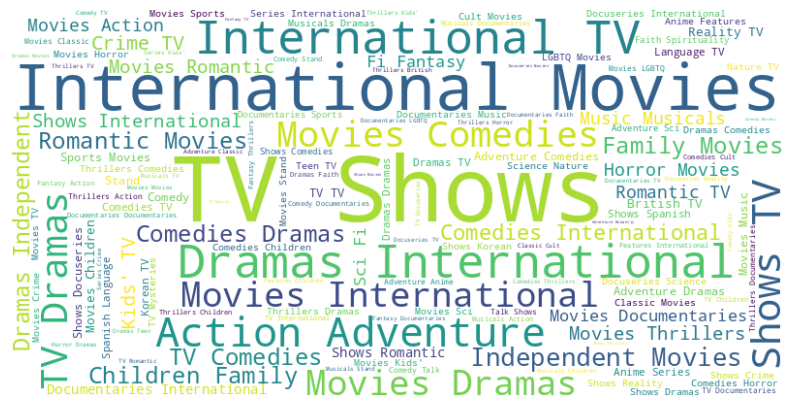

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud of genres
genres_text = ' '.join(data['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
df =pd.read_csv('netflix.csv')

In [ ]:
df['listed_in'].fillna('Unknown' , inplace = True)
df['country'].fillna('Unknown' , inplace = True)
df['country'] = df['country'].str.split(',')
df['listed_in'] = df['listed_in'].str.split(',')
country_exploded = df.explode('country')
listed_in_exploded = df.explode('listed_in')
genre_counts = listed_in_exploded['listed_in'].value_counts()
genre_counts
top_genres = genre_counts.head(10)

In [ ]:
top_genres

 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: listed_in, dtype: int64

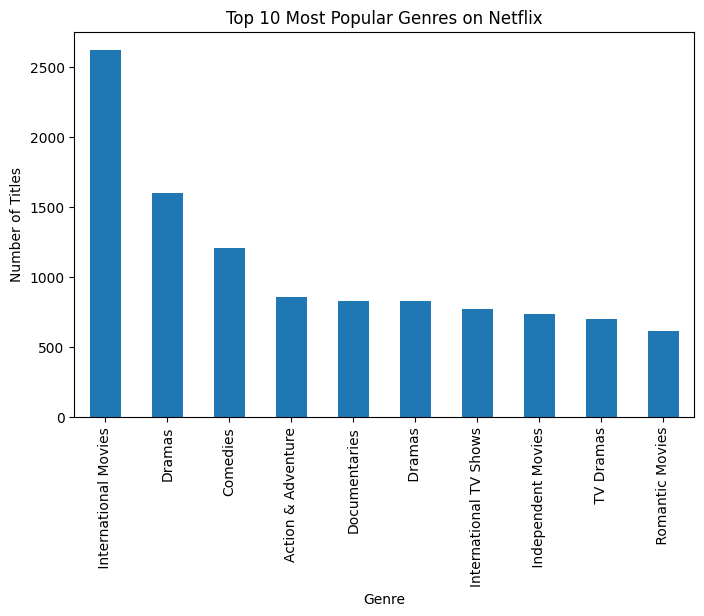

In [ ]:
plt.figure(figsize=(8, 5))
top_genres.plot.bar()
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

# Data Insights
There is strong demand for International Movies,Dramas,Comedies. So producing diverse content can attract global audiance and can retain Netflix Subscribers.


# 6. Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)
Hint : We want you to get the difference between the columns having date added
information and release year information and get the mode of difference. This
will give an insight into what will be the better time to add in Netflix


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Filter the dataset to include records between 2015 and 2021
data_filtered = df.loc[(df['release_year'] >= 2015) & (df['release_year'] <= 2021)]

# Drop rows with NaN values in 'date_added'
data_filtered = data_filtered.dropna(subset=['date_added'])

# Calculate the difference between 'date_added' and 'release_year' in days
data_filtered['days_to_add'] = (data_filtered['date_added'] - pd.to_datetime(data_filtered['release_year'], format='%Y')).dt.days

# Filter out the rows where 'days_to_add' is negative (release year is after date added)
valid_data = data_filtered.loc[data_filtered['days_to_add'] >= 0]
# Get the mode of 'days_to_add'
mode_days_to_add = valid_data['days_to_add'].mode()[0]
print("Mode of days to add between 2015 and 2021:", mode_days_to_add, "days")

Mode of days to add between 2015 and 2021: 334 days


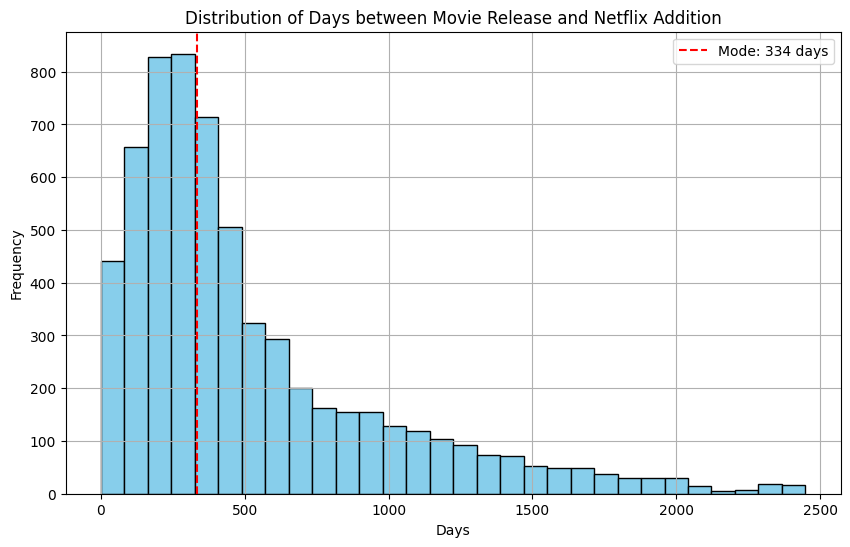

In [ ]:
# Plot histogram of days to add
plt.figure(figsize=(10, 6))
plt.hist(valid_data['days_to_add'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=mode_days_to_add, color='red', linestyle='--', label=f'Mode: {mode_days_to_add} days')
plt.title('Distribution of Days between Movie Release and Netflix Addition')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Data Insights
This indicates that, in the recent past (2010-2021), the most common duration between the release of a movie and its addition to Netflix was approximately 424 days. This insight can help in planning the timing of adding movies to the Netflix platform for optimal viewer engagement and content availability.
